<a href="https://colab.research.google.com/github/aristocrat71/Bone.ai/blob/main/models/Locator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import shutil
import os

# Create the Kaggle directory if it doesn't exist
os.makedirs('/root/.kaggle', exist_ok=True)

# Copy kaggle.json from Drive to the Kaggle directory
shutil.copy('/content/drive/My Drive/boneai/kaggle.json', '/root/.kaggle/')

'/root/.kaggle/kaggle.json'

In [4]:
os.chmod('/root/.kaggle/kaggle.json', 600)

In [5]:
!kaggle datasets download -d pkdarabi/bone-fracture-detection-computer-vision-project

Dataset URL: https://www.kaggle.com/datasets/pkdarabi/bone-fracture-detection-computer-vision-project
License(s): Attribution 4.0 International (CC BY 4.0)


In [6]:
!rm -rf bone_fracture_data

import zipfile

with zipfile.ZipFile("bone-fracture-detection-computer-vision-project.zip", 'r') as zip_ref:
    zip_ref.extractall("bone_fracture_data")

In [7]:
!ls

bone_fracture_data				     drive
bone-fracture-detection-computer-vision-project.zip  sample_data


In [8]:
!pwd

/content


In [9]:
!cd bone_fracture_data

In [10]:
import os
os.listdir("bone_fracture_data")

['bone fracture detection.v4-v4.yolov8', 'BoneFractureYolo8']

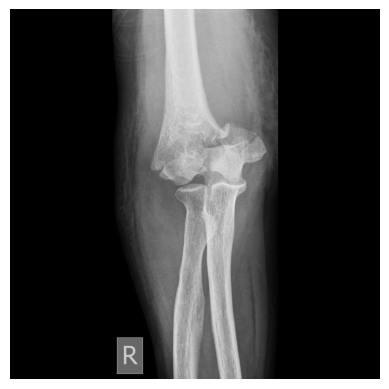

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(r"/content/bone_fracture_data/BoneFractureYolo8/train/images/distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [13]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.5/974.5 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [14]:
from ultralytics import YOLO

# Load model
model = YOLO("yolov8n.pt")  # or yolov8s.pt, yolov8m.pt for bigger models

# Train
model.train(data="/content/bone_fracture_data/BoneFractureYolo8/data.yaml", epochs=50, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 98.1MB/s]


Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/bone_fracture_data/BoneFractureYolo8/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

100%|██████████| 755k/755k [00:00<00:00, 20.8MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 51.9MB/s]


AMP: checks passed ✅


train: Scanning /content/bone_fracture_data/BoneFractureYolo8/train/labels... 3631 images, 1827 backgrounds, 0 corrupt: 100%|██████████| 3631/3631 [00:02<00:00, 1780.59it/s]


train: New cache created: /content/bone_fracture_data/BoneFractureYolo8/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/bone_fracture_data/BoneFractureYolo8/valid/labels... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<00:00, 789.34it/s]

val: New cache created: /content/bone_fracture_data/BoneFractureYolo8/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.08G      2.782      6.806       2.33         14        640: 100%|██████████| 227/227 [01:13<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        348        204    0.00114      0.342    0.00884     0.0023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.59G      2.516      5.205      2.089         19        640: 100%|██████████| 227/227 [01:07<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.94it/s]

                   all        348        204      0.228     0.0633     0.0201    0.00605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       2.6G      2.446      4.223      2.077         17        640: 100%|██████████| 227/227 [01:06<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.20it/s]


                   all        348        204      0.775     0.0411     0.0514     0.0154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.62G      2.437      3.817      2.065         16        640: 100%|██████████| 227/227 [01:07<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.09it/s]

                   all        348        204      0.263     0.0904     0.0657     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.64G      2.368      3.551      2.018         18        640: 100%|██████████| 227/227 [01:07<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.25it/s]


                   all        348        204      0.782     0.0834     0.0808     0.0296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.66G      2.299       3.35      2.005         12        640: 100%|██████████| 227/227 [01:08<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.38it/s]

                   all        348        204      0.328      0.124      0.116     0.0456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.67G      2.234      3.169      1.969         16        640: 100%|██████████| 227/227 [01:07<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.14it/s]

                   all        348        204      0.245       0.18       0.14     0.0435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.69G      2.214      3.068      1.919         20        640: 100%|██████████| 227/227 [01:08<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.32it/s]

                   all        348        204      0.162      0.182      0.147      0.056



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.71G      2.182      2.915       1.93         28        640: 100%|██████████| 227/227 [01:08<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.16it/s]

                   all        348        204      0.299      0.247       0.18     0.0575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.72G      2.166      2.879      1.897         15        640: 100%|██████████| 227/227 [01:08<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.53it/s]


                   all        348        204      0.329        0.2       0.16     0.0564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.74G      2.141      2.769      1.889         11        640: 100%|██████████| 227/227 [01:07<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.09it/s]

                   all        348        204      0.542      0.181      0.199     0.0657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.76G      2.104      2.692      1.862         10        640: 100%|██████████| 227/227 [01:05<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]

                   all        348        204        0.3      0.207      0.218     0.0808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.78G      2.067       2.61      1.824         20        640: 100%|██████████| 227/227 [01:06<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.24it/s]

                   all        348        204      0.238      0.261      0.232     0.0812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.79G      2.045      2.521      1.805         17        640: 100%|██████████| 227/227 [01:06<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.19it/s]

                   all        348        204      0.259      0.261      0.229     0.0765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       2.8G      2.038      2.493      1.805         19        640: 100%|██████████| 227/227 [01:07<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.49it/s]


                   all        348        204      0.316      0.228      0.244      0.083

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.83G      1.986      2.431      1.753         14        640: 100%|██████████| 227/227 [01:08<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.31it/s]


                   all        348        204      0.264      0.201      0.198     0.0734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.84G       1.97      2.303      1.728         17        640: 100%|██████████| 227/227 [01:07<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.29it/s]

                   all        348        204      0.225      0.221      0.176     0.0569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.86G      1.953      2.289      1.744          9        640: 100%|██████████| 227/227 [01:08<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.27it/s]

                   all        348        204      0.292      0.233      0.234     0.0898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.88G      1.941      2.233      1.705          7        640: 100%|██████████| 227/227 [01:08<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.54it/s]


                   all        348        204      0.336      0.221      0.229     0.0878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.9G      1.907      2.176      1.689         12        640: 100%|██████████| 227/227 [01:08<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.23it/s]

                   all        348        204      0.305      0.305      0.274     0.0954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.91G      1.868      2.098      1.675         15        640: 100%|██████████| 227/227 [01:10<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.37it/s]

                   all        348        204      0.281      0.289      0.248     0.0897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.93G      1.833      2.041      1.658         14        640: 100%|██████████| 227/227 [01:09<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.18it/s]


                   all        348        204      0.378      0.226      0.239     0.0826

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.94G      1.799       1.97      1.619         19        640: 100%|██████████| 227/227 [01:08<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.51it/s]

                   all        348        204       0.32       0.31      0.272      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.96G       1.77      1.921      1.611         17        640: 100%|██████████| 227/227 [01:08<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.49it/s]

                   all        348        204      0.253      0.319      0.234      0.084



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.98G      1.752      1.832      1.599         15        640: 100%|██████████| 227/227 [01:06<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.96it/s]

                   all        348        204      0.305      0.254      0.236     0.0837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         3G      1.728      1.787      1.573         19        640: 100%|██████████| 227/227 [01:06<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.76it/s]

                   all        348        204      0.294      0.292      0.235     0.0854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.01G      1.722      1.801       1.57         12        640: 100%|██████████| 227/227 [01:06<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.13it/s]

                   all        348        204      0.281      0.259      0.214     0.0763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.03G      1.687      1.736      1.546         18        640: 100%|██████████| 227/227 [01:06<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.78it/s]

                   all        348        204      0.374      0.243      0.244     0.0921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.05G      1.676      1.696      1.519          9        640: 100%|██████████| 227/227 [01:07<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.36it/s]

                   all        348        204      0.395      0.251      0.245     0.0849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.06G      1.664      1.647       1.53         23        640: 100%|██████████| 227/227 [01:07<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.98it/s]

                   all        348        204      0.318      0.286       0.24     0.0861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.08G      1.626      1.605      1.497         14        640: 100%|██████████| 227/227 [01:08<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.34it/s]

                   all        348        204      0.335      0.328      0.259     0.0926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       3.1G      1.629      1.586      1.507         18        640: 100%|██████████| 227/227 [01:09<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.22it/s]

                   all        348        204      0.228      0.294      0.228     0.0815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.12G       1.59      1.518      1.469         10        640: 100%|██████████| 227/227 [01:08<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.32it/s]

                   all        348        204      0.351      0.291      0.253     0.0916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.13G       1.61      1.521      1.469         16        640: 100%|██████████| 227/227 [01:08<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.13it/s]


                   all        348        204      0.281      0.297      0.232     0.0857

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.15G      1.538       1.43      1.425         10        640: 100%|██████████| 227/227 [01:08<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.36it/s]

                   all        348        204      0.391      0.273      0.254     0.0987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.17G      1.494      1.349      1.402         13        640: 100%|██████████| 227/227 [01:08<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.32it/s]

                   all        348        204      0.328      0.299      0.257     0.0885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.18G      1.494      1.354       1.41          6        640: 100%|██████████| 227/227 [01:08<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.06it/s]

                   all        348        204      0.342      0.299      0.277        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       3.2G      1.493       1.34      1.389         11        640: 100%|██████████| 227/227 [01:06<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.33it/s]

                   all        348        204      0.327      0.263       0.23     0.0815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.21G      1.466      1.316      1.384         17        640: 100%|██████████| 227/227 [01:06<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.90it/s]

                   all        348        204      0.368      0.262       0.27     0.0967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.23G      1.436       1.26      1.343         13        640: 100%|██████████| 227/227 [01:06<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.35it/s]

                   all        348        204      0.331      0.302      0.256      0.089


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.25G      1.393      1.116      1.422          9        640: 100%|██████████| 227/227 [01:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.76it/s]

                   all        348        204      0.357      0.289      0.265     0.0922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.27G      1.349      1.051      1.397          9        640: 100%|██████████| 227/227 [01:00<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.92it/s]

                   all        348        204      0.305      0.316      0.243     0.0856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.28G      1.307      1.003      1.357          8        640: 100%|██████████| 227/227 [01:01<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.70it/s]

                   all        348        204       0.34      0.285      0.256     0.0861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       3.3G      1.272     0.9746      1.337          6        640: 100%|██████████| 227/227 [01:01<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.92it/s]

                   all        348        204      0.332      0.302      0.263     0.0859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.32G      1.243     0.9474      1.318          8        640: 100%|██████████| 227/227 [01:00<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.73it/s]


                   all        348        204      0.365      0.294      0.275     0.0919

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.34G      1.218     0.9021      1.298          7        640: 100%|██████████| 227/227 [01:01<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.29it/s]

                   all        348        204      0.306       0.32      0.265     0.0933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.35G      1.199     0.8913      1.286          8        640: 100%|██████████| 227/227 [01:00<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.86it/s]

                   all        348        204      0.353      0.321      0.282        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.37G      1.187     0.8653      1.273         14        640: 100%|██████████| 227/227 [01:01<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.57it/s]

                   all        348        204      0.348      0.294      0.267     0.0974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.39G      1.174     0.8394      1.257         10        640: 100%|██████████| 227/227 [01:01<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.70it/s]

                   all        348        204      0.363      0.305      0.262     0.0931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.41G      1.161     0.8441      1.256          7        640: 100%|██████████| 227/227 [01:00<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.49it/s]

                   all        348        204      0.357      0.299      0.264     0.0955



50 epochs completed in 0.972 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]


                   all        348        204      0.322      0.308      0.272      0.103
        elbow positive         28         29      0.204      0.177      0.115     0.0275
      fingers positive         41         48      0.453      0.207      0.184     0.0525
      forearm fracture         37         43      0.433      0.535      0.463      0.201
               humerus         31         36      0.454      0.556      0.546      0.232
     shoulder fracture         19         20      0.281        0.3      0.284     0.0963
        wrist positive         17         28      0.104     0.0714     0.0425    0.00987
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e2343f1f590>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [15]:
metrics = model.val()
metrics

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/bone_fracture_data/BoneFractureYolo8/valid/labels.cache... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.39it/s]


                   all        348        204      0.304      0.332      0.272      0.103
        elbow positive         28         29      0.229      0.241      0.111     0.0268
      fingers positive         41         48      0.381      0.208      0.182     0.0522
      forearm fracture         37         43      0.424      0.558      0.474      0.207
               humerus         31         36      0.453      0.575      0.542       0.23
     shoulder fracture         19         20       0.22        0.3      0.283     0.0919
        wrist positive         17         28       0.12      0.107     0.0416     0.0115
Speed: 1.3ms preprocess, 5.5ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e25fc953890>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     


image 1/348 /content/bone_fracture_data/BoneFractureYolo8/valid/images/coronoid-process-fracture_jpg.rf.71650459c69a9734ecd545067cf18bf4.jpg: 640x640 (no detections), 11.4ms
image 2/348 /content/bone_fracture_data/BoneFractureYolo8/valid/images/image1_0_png.rf.d29cab92b154a83ca5bf7e40083673a2.jpg: 640x320 (no detections), 71.5ms
image 3/348 /content/bone_fracture_data/BoneFractureYolo8/valid/images/image1_1000_png.rf.7eebc2918f75be5baf4c32a091ef963d.jpg: 640x192 2 fingers positives, 87.0ms
image 4/348 /content/bone_fracture_data/BoneFractureYolo8/valid/images/image1_1026_png.rf.e9dc3004de762ddd0f75d8f17fb5d0f6.jpg: 512x640 (no detections), 92.6ms
image 5/348 /content/bone_fracture_data/BoneFractureYolo8/valid/images/image1_1029_png.rf.8f1dfb1982511a9b38867fa9444965f0.jpg: 512x640 (no detections), 45.6ms
image 6/348 /content/bone_fracture_data/BoneFractureYolo8/valid/images/image1_102_png.rf.c78fe3e151ea0c9779767726479e4d4d.jpg: 640x512 1 humerus, 150.9ms
image 7/348 /content/bone_frac

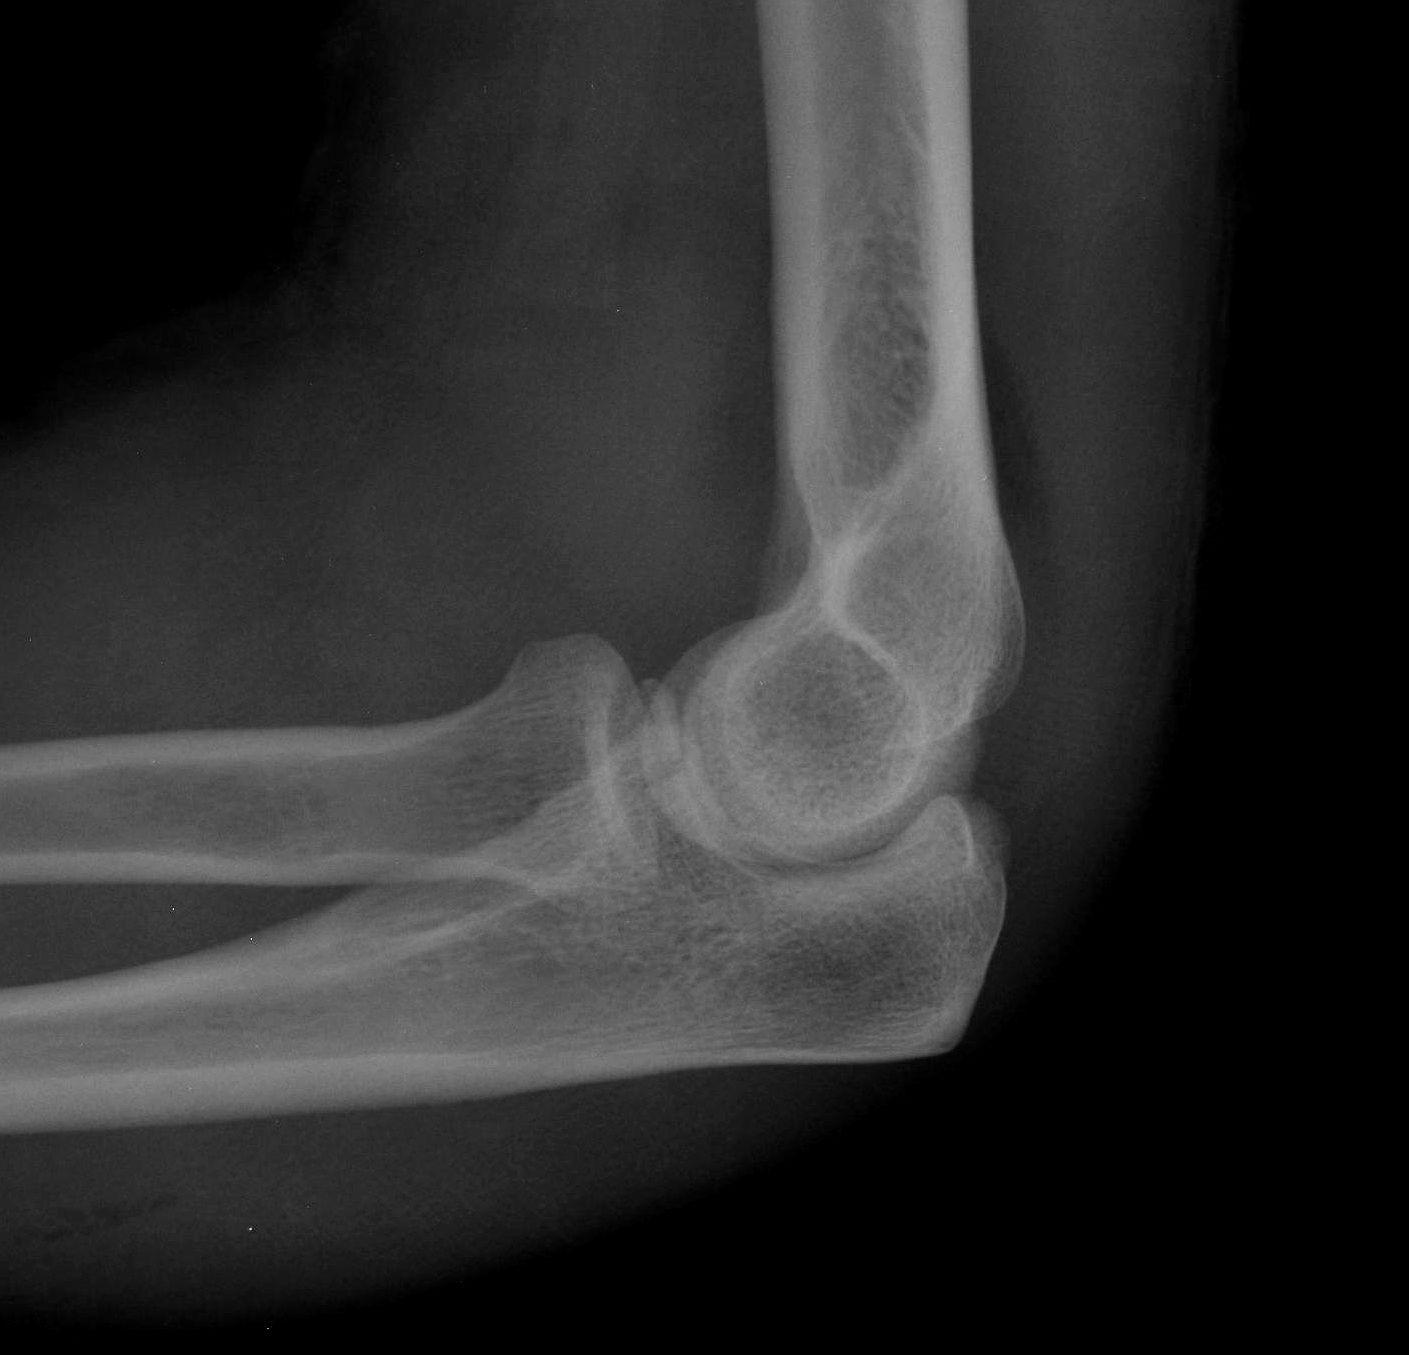

In [16]:
results = model.predict(source="/content/bone_fracture_data/BoneFractureYolo8/valid/images", conf=0.25)
results[0].show()  # Display with bounding boxes


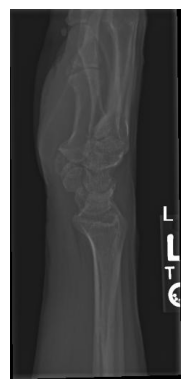

In [19]:
img = Image.open(r"/content/bone_fracture_data/BoneFractureYolo8/valid/images/image1_0_png.rf.d29cab92b154a83ca5bf7e40083673a2.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

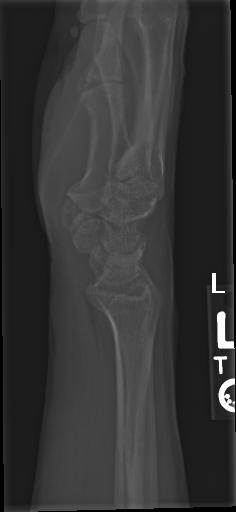

In [20]:
results[1].show()